<a href="https://colab.research.google.com/github/krishnamanc/Pytorch/blob/main/5_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# minst dataset (60,000 train images, 10,000 test images)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torch.utils.data.dataloader import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Convert mnist image files into a tensor of 4-Dimensions
transform = transforms.ToTensor()

In [6]:
# Train data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 161940807.39it/s]

Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 48357562.40it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 62443716.67it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10021319.71it/s]


Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [7]:
# Test data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
pwd

'/content'

In [11]:
ls

sample_data/


In [12]:
cd ../

/


In [13]:
pwd

'/'

In [14]:
ls

bin@       cuda-keyring_1.0-1_all.deb  home/    lib64@   NGC-DL-CONTAINER-LICENSE  run/   tmp/
boot/      datalab/                    kaggle/  libx32@  opt/                      sbin@  tools/
cnn_data/  dev/                        lib@     media/   proc/                     srv/   usr/
content/   etc/                        lib32@   mnt/     root/                     sys/   var/


In [15]:
cd cnn_data

/cnn_data


In [16]:
ls

MNIST/


In [17]:
cd ../

/


In [18]:
ls

bin@       cuda-keyring_1.0-1_all.deb  home/    lib64@   NGC-DL-CONTAINER-LICENSE  run/   tmp/
boot/      datalab/                    kaggle/  libx32@  opt/                      sbin@  tools/
cnn_data/  dev/                        lib@     media/   proc/                     srv/   usr/
content/   etc/                        lib32@   mnt/     root/                     sys/   var/


In [19]:
cd content

/content


In [20]:
# Create a batch size for images
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [31]:
# Define our CNN Model
# Describe convolutional layer and what its doing (2 cnn layers)
conv1 = nn.Conv2d(1, 20, 2, 1) # 1 feature in, 20 features out, kernel size is 2, stride length(brush size(1) each time)
conv2 = nn.Conv2d(20, 40, 2, 1)# 20 features in, 40 features out, kernel size is 2, stride length(brush size(1) each time)

In [23]:
# Grab 1 MNIST record or image
for i, (X_Train, y_train) in enumerate(train_data):
  break

In [24]:
X_Train.shape

torch.Size([1, 28, 28])

In [32]:
# convert to 4d
x = X_Train.view(1,1,28,28) # 1 batch of 1 image of 28*28 size

In [33]:
# Perform our first convolution
x = F.relu(conv1(x)) # rectified Linear unit for our activation function

In [34]:
# 1 single image, 20 is the filters we asked for, 27*27
x.shape

torch.Size([1, 20, 27, 27])

In [35]:
# pass through the pooling(shrinking the imformation) layer
x = F.max_pool2d(x,2,2) # kernel size is 2 and stride size is 2

In [36]:
x.shape # 27 / 2 = 13

torch.Size([1, 20, 13, 13])

In [37]:
# Do our second convolutional layer
x = F.relu(conv2(x))

In [38]:
x.shape # we didn't set the padding, so we lose 2 pixels around the outside of the image after the convolution

torch.Size([1, 40, 12, 12])

In [39]:
# Do our second pooling layer
x = F.max_pool2d(x,2,2)

In [41]:
x.shape # 12 / 2 = 6

torch.Size([1, 40, 6, 6])

In [43]:
(((28) / 2) -2) / 2

6.0

In [44]:
40*6*6

1440

In [45]:
# Model Class
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 20, 2, 1)
    self.conv2 = nn.Conv2d(20, 40, 2, 1)
    # Fully connected layer (torch.Size([1, 40, 6, 6])) here, 40*6*6 = 1440
    self.fc1 = nn.Linear(1440, 360)
    self.fc2 = nn.Linear(360, 90)
    self.fc3 = nn.Linear(90, 30)
    self.fc4 = nn.Linear(30, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2*2 kernal and stride length of 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2*2 kernal and stride length of 2

    # Re-View to flatten it out
    X = X.view(-1, 1440) # -1 so that we can vary the batch size

    # Fully Connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = F.relu(self.fc3(X))
    X = self.fc4(X)
    return F.log_softmax(X, dim=1)

In [46]:
torch.manual_seed(82)

In [47]:
# Create an Instance of our model
model = Model()
model

Model(
  (conv1): Conv2d(1, 20, kernel_size=(2, 2), stride=(1, 1))
  (conv2): Conv2d(20, 40, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=1440, out_features=360, bias=True)
  (fc2): Linear(in_features=360, out_features=90, bias=True)
  (fc3): Linear(in_features=90, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=10, bias=True)
)

In [48]:
# Set the criterion of model to measure the error (Loss)
# how far off the predictions are from the data
loss_fn = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate(if error doesn't go down after some epochs, reduce learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# one epoch means, one forward pass through the neural network

In [49]:
for param in model.parameters():
    print(type(param), param.size())

<class 'torch.nn.parameter.Parameter'> torch.Size([20, 1, 2, 2])
<class 'torch.nn.parameter.Parameter'> torch.Size([20])
<class 'torch.nn.parameter.Parameter'> torch.Size([40, 20, 2, 2])
<class 'torch.nn.parameter.Parameter'> torch.Size([40])
<class 'torch.nn.parameter.Parameter'> torch.Size([360, 1440])
<class 'torch.nn.parameter.Parameter'> torch.Size([360])
<class 'torch.nn.parameter.Parameter'> torch.Size([90, 360])
<class 'torch.nn.parameter.Parameter'> torch.Size([90])
<class 'torch.nn.parameter.Parameter'> torch.Size([30, 90])
<class 'torch.nn.parameter.Parameter'> torch.Size([30])
<class 'torch.nn.parameter.Parameter'> torch.Size([10, 30])
<class 'torch.nn.parameter.Parameter'> torch.Size([10])


In [50]:
import time
start_time = time.time()

# Create Variables To Track Things

# for epoch in a range , lalalalala
#  Train our model!
# Epochs? (one run through all the training data in our network)
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for epoch in range(epochs):

  trn_corr = 0
  tst_corr = 0

  # call model.train
  model.train()

  # we have batches here
  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1

    #1. Do the forward pass
    y_pred = model(X_train) # 2d input

    #2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of coorect predictions
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch
    trn_corr += batch_corr # keep track as we go along in training

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

    train_losses.append(loss.detach().numpy())
    train_correct.append(trn_corr)
    ### Test time!
    # call model.eval

  model.eval()

  with torch.inference_mode():

    for b,(X_test, y_test) in enumerate(test_loader):
      # Do the forward pass
      test_pred = model(X_test)

      # Calculate the loss
      test_loss = loss_fn(test_pred, y_test)

      predicted = torch.max(test_pred.data, 1)[1] # add up the number of coorect predictions
      tst_corr += (predicted == y_test).sum() # keep track as we go along in training


      test_losses.append(test_loss.detach().numpy())
      test_correct.append(tst_corr)
      if b%600 == 0:
        # print out what's happening
        print(f"Epoch: {epoch} | Batch: {b} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f}")

current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0 | Batch: 0 | Train loss: 0.0215 | Test loss: 0.0217
Epoch: 0 | Batch: 600 | Train loss: 0.0215 | Test loss: 0.0216
Epoch: 1 | Batch: 0 | Train loss: 0.0280 | Test loss: 0.0325
Epoch: 1 | Batch: 600 | Train loss: 0.0280 | Test loss: 0.0165
Epoch: 2 | Batch: 0 | Train loss: 0.0001 | Test loss: 0.0235
Epoch: 2 | Batch: 600 | Train loss: 0.0001 | Test loss: 0.0035
Epoch: 3 | Batch: 0 | Train loss: 0.0005 | Test loss: 0.0024
Epoch: 3 | Batch: 600 | Train loss: 0.0005 | Test loss: 0.0567
Epoch: 4 | Batch: 0 | Train loss: 0.0003 | Test loss: 0.0015
Epoch: 4 | Batch: 600 | Train loss: 0.0003 | Test loss: 0.0041
Epoch: 5 | Batch: 0 | Train loss: 0.0030 | Test loss: 0.0007
Epoch: 5 | Batch: 600 | Train loss: 0.0030 | Test loss: 0.0094
Epoch: 6 | Batch: 0 | Train loss: 0.0000 | Test loss: 0.0004
Epoch: 6 | Batch: 600 | Train loss: 0.0000 | Test loss: 0.0102
Epoch: 7 | Batch: 0 | Train loss: 0.0000 | Test loss: 0.0011
Epoch: 7 | Batch: 600 | Train loss: 0.0000 | Test loss: 0.0102
Epoch: 8

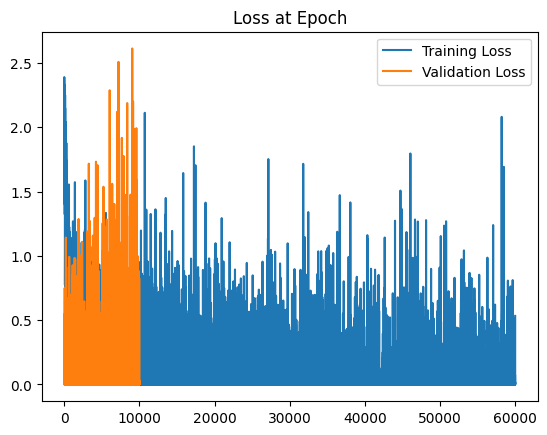

In [51]:
# Graph the loss at each epoch
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

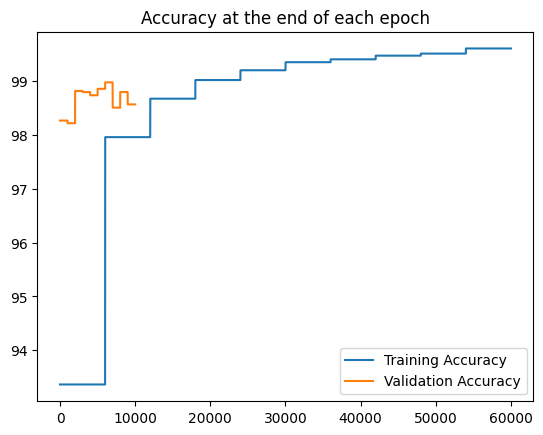

In [52]:
# graph of accuracy
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

In [53]:
test_load_everything = DataLoader(test_data, batch_size=1000, shuffle=False)

In [54]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [55]:
# Did it correct
correct.item()

9857

In [56]:
correct.item()/len(test_data)*100

98.57000000000001

In [57]:
# Grab an image
test_data[4143] # Tensor with an image in it.... at end it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [58]:
# Grab the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [59]:
# Reshape it
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

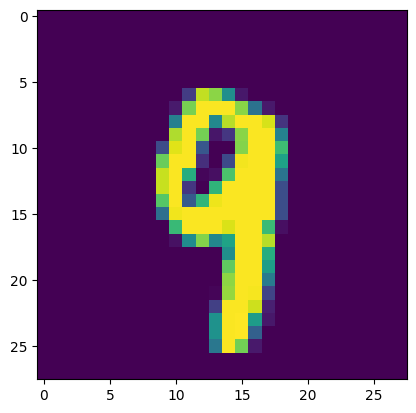

In [60]:
# Show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [61]:
# Pass the image through our model
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[4143][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28*28 image

In [62]:
# Check the new prediction... get probabilities
new_prediction

tensor([[-2.2990e+01, -1.8459e+01, -2.3457e+01, -1.8553e+01, -1.4759e+01,
         -2.4525e+01, -5.2435e+01, -2.2464e+01, -1.7755e+01, -3.5763e-07]])

In [63]:
new_prediction.argmax()

tensor(9)

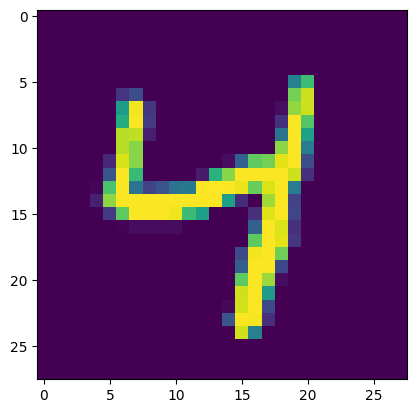

In [64]:
# Show the image
plt.imshow(test_data[1978][0].reshape(28,28))

In [65]:
# Pass the image through our model
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[1978][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28*28 image
    print(f"Model predicted that it is {new_prediction.argmax()}")

Model predicted that it is 4


In [66]:
# Save our NN Model
torch.save(model.state_dict(), 'mnistmodel.pt')

In [67]:
# Load the Saved Model
new_model = Model()

In [68]:
new_model.load_state_dict(torch.load('mnistmodel.pt'))

<All keys matched successfully>

In [69]:
model.eval()

Model(
  (conv1): Conv2d(1, 20, kernel_size=(2, 2), stride=(1, 1))
  (conv2): Conv2d(20, 40, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=1440, out_features=360, bias=True)
  (fc2): Linear(in_features=360, out_features=90, bias=True)
  (fc3): Linear(in_features=90, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=10, bias=True)
)

In [70]:
new_model.eval()

Model(
  (conv1): Conv2d(1, 20, kernel_size=(2, 2), stride=(1, 1))
  (conv2): Conv2d(20, 40, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=1440, out_features=360, bias=True)
  (fc2): Linear(in_features=360, out_features=90, bias=True)
  (fc3): Linear(in_features=90, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=10, bias=True)
)

In [71]:
# Pass the image through our model
new_model.eval()
with torch.no_grad():
    new_prediction = new_model(test_data[1978][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28*28 image
    print(f"Model predicted that it is {new_prediction.argmax()}")

Model predicted that it is 4


In [ ]:
from PIL import Image

In [ ]:
img = Image.open('img_3.jpg')
img_tensor = transform(img).unsqueeze(0)

In [ ]:
# Pass the image through our model
new_model.eval()
with torch.no_grad():
    new_prediction = new_model(img_tensor) # batch size of 1, 1 color channel, 28*28 image
    print(f"Model predicted that it is {new_prediction.argmax()}")

Model predicted that it is 9
